In [7]:
from PyLTSpice import SimRunner, SpiceEditor, LTspice, RawRead
import numpy as np
import matplotlib.pyplot as plt 

runner = SimRunner(output_folder='./recapitulation_sim_results', simulator=LTspice, timeout=28800, verbose = True) 

netlist = SpiceEditor('./recapitulation_crossbar.net')
raw, log = runner.run_now(netlist)

Sat Jun  8 17:11:12 2024 info: RunTask #1:: Starting simulation 1: recapitulation_sim_results\recapitulation_crossbar_1.net

Sat Jun  8 20:14:38 2024 info: RunTask #1:Simulation Successful. Time elapsed: 03:03:26.0101

Sat Jun  8 20:14:38 2024 info: RunTask #1:Simulation Finished. Calling...dummy_callback(rawfile, logfile)

Sat Jun  8 20:14:38 2024 info: RunTask #1:Callback Finished. Time elapsed: 00.0000 secs



In [8]:
raw = RawRead("./recapitulation_sim_results/recapitulation_crossbar_1.raw")   # Read the RAW file contents from disk
raw.get_trace_names()

['time',
 'V(vdd)',
 'V(in0)',
 'V(lt0)',
 'V(row0)',
 'V(row0p)',
 'V(col0)',
 'V(col1)',
 'V(col2)',
 'V(col3)',
 'V(col4)',
 'V(col5)',
 'V(col6)',
 'V(col7)',
 'V(col8)',
 'V(col9)',
 'V(col10)',
 'V(col11)',
 'V(col12)',
 'V(col13)',
 'V(col14)',
 'V(col15)',
 'V(col16)',
 'V(col17)',
 'V(col18)',
 'V(col19)',
 'V(col20)',
 'V(col21)',
 'V(col22)',
 'V(col23)',
 'V(col24)',
 'V(col25)',
 'V(col26)',
 'V(col27)',
 'V(col28)',
 'V(col29)',
 'V(col30)',
 'V(col31)',
 'V(col32)',
 'V(col33)',
 'V(col34)',
 'V(col35)',
 'V(col36)',
 'V(col37)',
 'V(col38)',
 'V(col39)',
 'V(col40)',
 'V(col41)',
 'V(col42)',
 'V(col43)',
 'V(col44)',
 'V(col45)',
 'V(col46)',
 'V(col47)',
 'V(col48)',
 'V(col49)',
 'V(col50)',
 'V(col51)',
 'V(col52)',
 'V(col53)',
 'V(col54)',
 'V(col55)',
 'V(col56)',
 'V(col57)',
 'V(col58)',
 'V(col59)',
 'V(col60)',
 'V(col61)',
 'V(col62)',
 'V(col63)',
 'V(col64)',
 'V(col65)',
 'V(col66)',
 'V(col67)',
 'V(col68)',
 'V(col69)',
 'V(col70)',
 'V(col71)',
 'V(col

In [9]:
num_output_nodes = 196
threshold = 0.1
xdata = raw.get_axis()
spike_times_list = []
for i in range(num_output_nodes):
    data = np.array(raw.get_trace(f'V(out{i})'))
    falling_edges = np.where((data[:-1] >= threshold) & (data[1:] < threshold))[0]
    spike_times_list.append(np.array(xdata[falling_edges])*1e6)
spike_times_list

[array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([], dtype=float64),
 array([107.06996936]),
 array([ 61.25488384,  61.26513765, 116.97398247, 117.31251852,
        117.33038025]),
 array([ 48.4502565 ,  4

In [10]:
len(spike_times_list)

196

In [11]:
# Parameters
num_neurons = 196
total_time = 220  # microseconds
bin_size = 1    # microsecond
num_bins = int(total_time // bin_size)


# Reshape to 14x14 neuron grid
grid_shape = (14, 14)

# Create an empty 3D array to store the boolean spike information
spike_bins = np.zeros((num_bins, *grid_shape))

# Iterate through each neuron's spike times
for neuron_idx, spike_times in enumerate(spike_times_list):
    # Convert neuron index to grid coordinates
    row, col = divmod(neuron_idx, grid_shape[1])
    # Find the bin indices where spikes occur
        
    bin_indices = np.floor_divide(spike_times, bin_size).astype(int)
        
    spike_bins[bin_indices, row, col] = 255

# Now, `spike_bins` is a 3D array where:
# - spike_bins[i] is the 14x14 boolean array for the i-th time bin 
# - True indicates a neuron fired in that bin, False indicates it didn't

In [12]:
import numpy as np
import cv2  

# Video settings
frame_width = spike_bins.shape[2]  # Width of each frame (14 pixels)
frame_height = spike_bins.shape[1]  # Height of each frame (14 pixels)
fps = 10  # Frames per second

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
out = cv2.VideoWriter('./recapitulation_sim_results/recapitulation_2.mp4', fourcc, fps, (frame_width, frame_height), isColor=False)

# Write each frame to the video
for frame in spike_bins:
    # Convert frame to uint8 (0-255)
    frame_uint8 = (frame).astype(np.uint8)  
    # Write the frame
    out.write(frame_uint8)

# Release the VideoWriter object
out.release()

(array([104.,  15.,   4.,   3.,   1.,   3.,   2.,   3.,   3.,   5.,   1.,
          3.,   1.,   5.,   1.,   3.,   5.,   4.,   5.,  25.]),
 array([ 90.75649627, 108.3983842 , 126.04027212, 143.68216005,
        161.32404797, 178.9659359 , 196.60782383, 214.24971175,
        231.89159968, 249.5334876 , 267.17537553, 284.81726345,
        302.45915138, 320.10103931, 337.74292723, 355.38481516,
        373.02670308, 390.66859101, 408.31047893, 425.95236686,
        443.59425479]),
 <BarContainer object of 20 artists>)

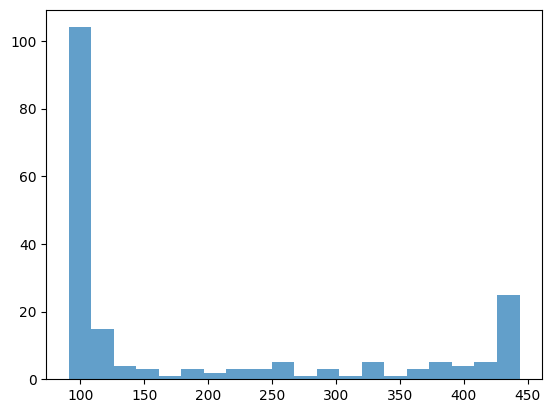

In [17]:
weights = np.load('./weights/trained_lt1_lt2_weight_reduced.npy')
weights = weights.reshape((14, 14, -1))
plt.hist(weights[:, :, 0].reshape((196, -1)), bins=20, density=False, alpha=0.7)
